# Importações


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
#Dados iniciais
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


# Persistência de dados **Nulos**

In [ ]:
#Verificando tipos/nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Tratando os dados nulos -> Basicamente substituí os valores nulos por "Normal", assumi que essa era a ideia buscada

In [ ]:
#Tratando os nulos da sleep disorder
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Normal')
df['Sleep Disorder'].head()

,Sleep Disorder
0,Normal
1,Normal
2,Normal
3,Sleep Apnea
4,Sleep Apnea


# Sem linhas **duplicadas**

In [ ]:
#Verificando se existem duplicados
df.duplicated().sum()

np.int64(0)

# Verificando a variável **Alvo**

<Axes: ylabel='Quality of Sleep'>

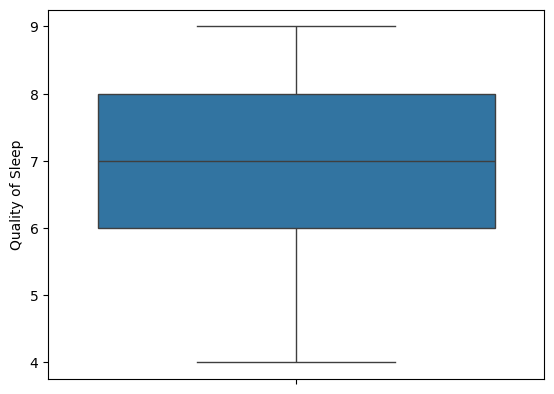

In [ ]:
alvo = df['Quality of Sleep']
sns.boxplot(alvo)

In [ ]:
alvo.describe()

,Quality of Sleep
count,374.000000
mean,7.312834
std,1.196956
min,4.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,9.000000


In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Verificando as variáveis Numéricas

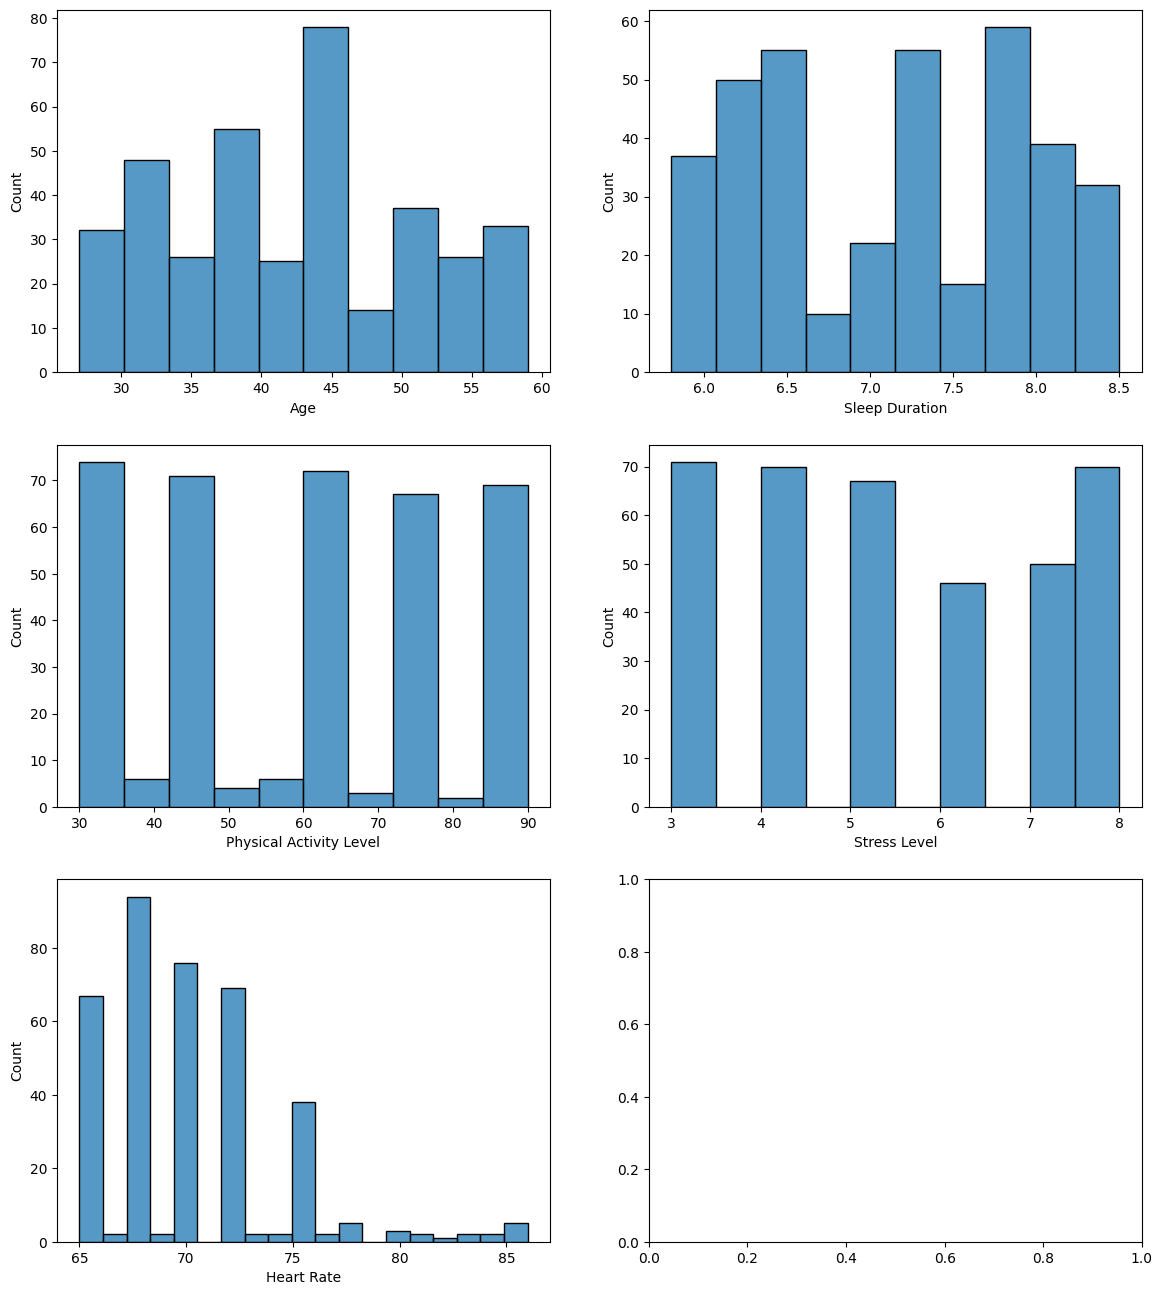

In [ ]:
numericas = df[['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate']]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
linha, coluna = 0, 0

for i in numericas.columns:
  sns.histplot(data=numericas, x=i, ax=axes[linha][coluna])
  coluna += 1
  if coluna >= 2:
    coluna = 0
    linha += 1

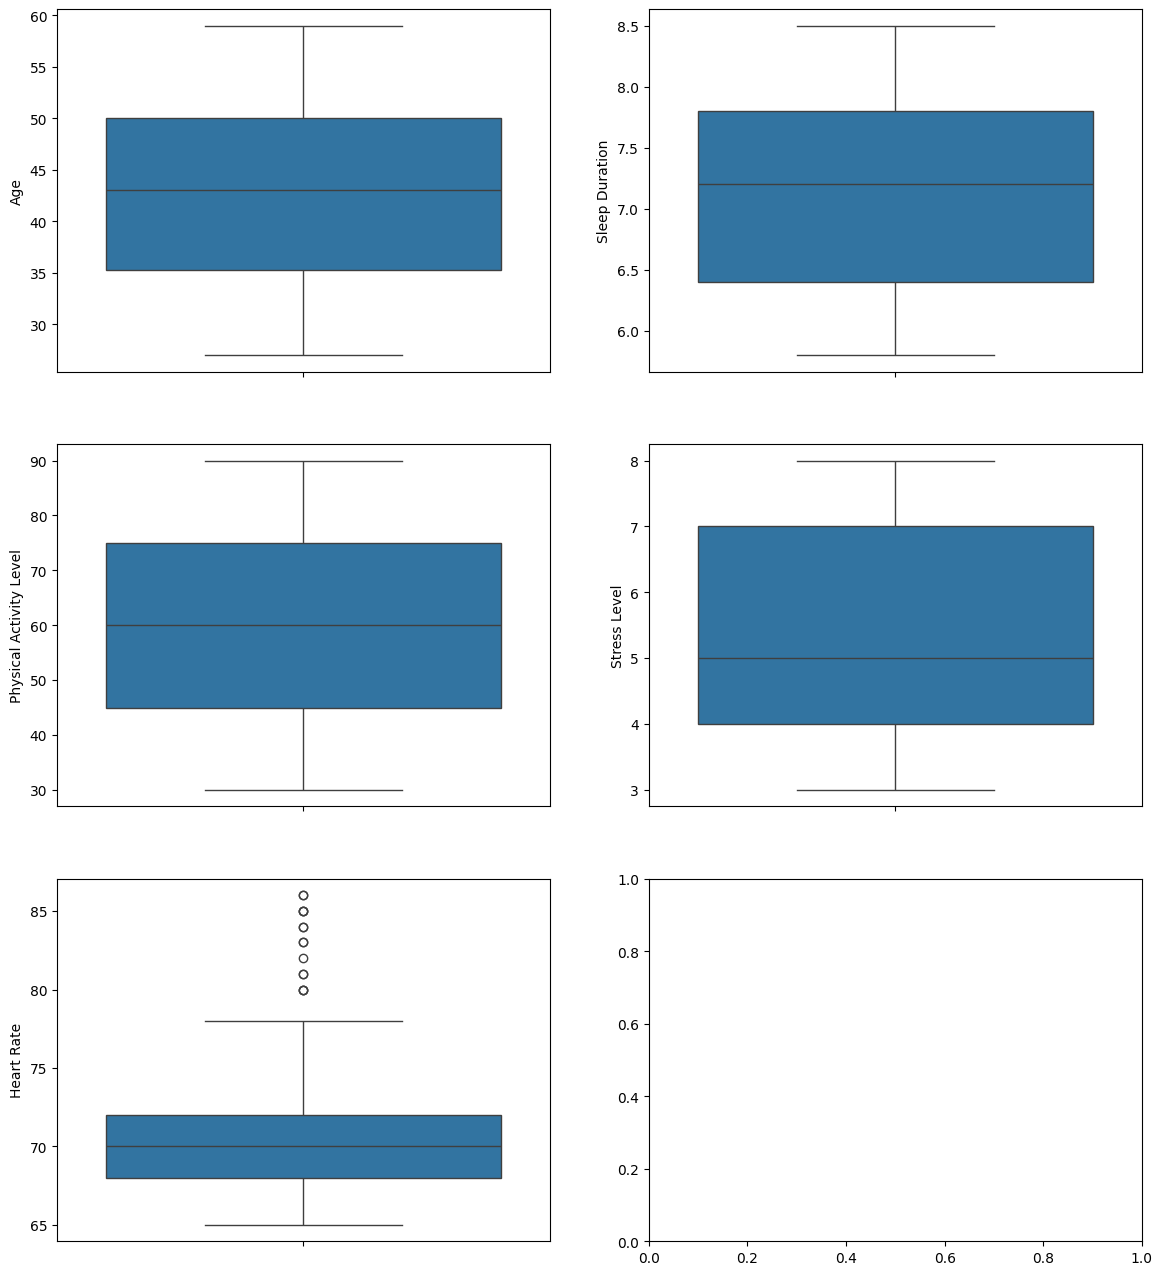

In [ ]:
numericas = df[['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate']]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
linha, coluna = 0, 0

for i in numericas.columns:
  sns.boxplot(data=numericas, y=i, ax=axes[linha][coluna])
  coluna += 1
  if coluna >= 2:
    coluna = 0
    linha += 1

Qualidade de sono tem maiores relações com Nível de stress, Batimentos cardíacos, Duração do sono e Idade

<Axes: >

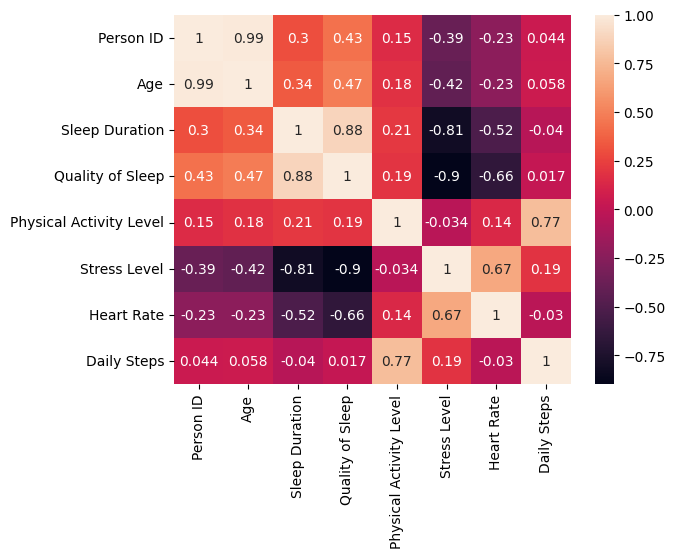

In [ ]:
sns.heatmap(df.corr(numeric_only=True), cmap='rocket', annot=True)

In [ ]:
numericas.describe()

,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate
count,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,59.171123,5.385027,70.165775
std,8.673133,0.795657,20.830804,1.774526,4.135676
min,27.000000,5.800000,30.000000,3.000000,65.000000
25%,35.250000,6.400000,45.000000,4.000000,68.000000
50%,43.000000,7.200000,60.000000,5.000000,70.000000
75%,50.000000,7.800000,75.000000,7.000000,72.000000
max,59.000000,8.500000,90.000000,8.000000,86.000000


Grande maioria não tem disordens de sono

<Axes: xlabel='Sleep Disorder', ylabel='count'>

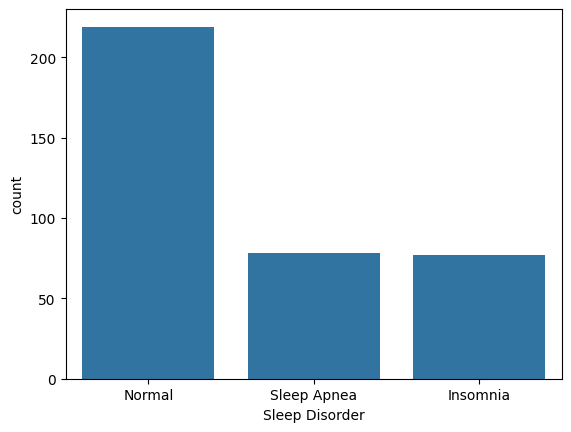

In [ ]:
Categoricos = df[['Sleep Disorder', 'Occupation']]

sns.countplot(Categoricos, x='Sleep Disorder')

# Observamos que algumas profissões carecem de dados, então resolvi tratá-los

<Axes: xlabel='Occupation', ylabel='count'>

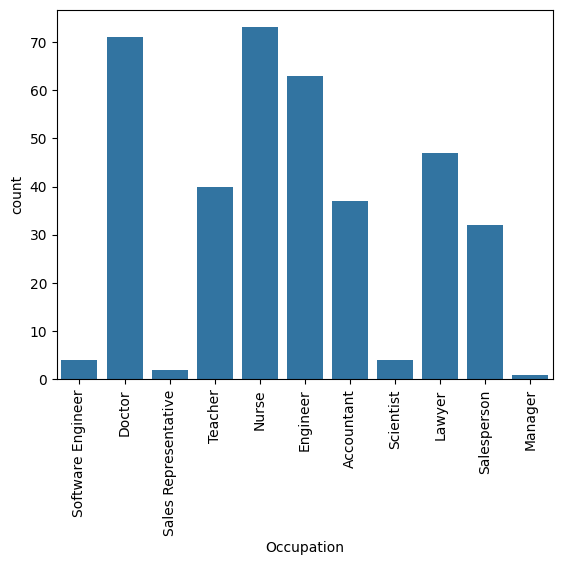

In [ ]:
plt.xticks(rotation=90)
sns.countplot(Categoricos, x='Occupation')

Considerei Engenheiros de software como engenheiros, e representantes de vendas como vendedor. Os outros escassos eu tirei

In [ ]:
df['Occupation'] = df['Occupation'].replace({'Software Engineer': 'Engineer',
                                             'Sales Representative': 'Salesperson'})

df = df[~df['Occupation'].isin(['Manager', 'Scientist'])]
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
3,4,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


<Axes: xlabel='Occupation', ylabel='Quality of Sleep'>

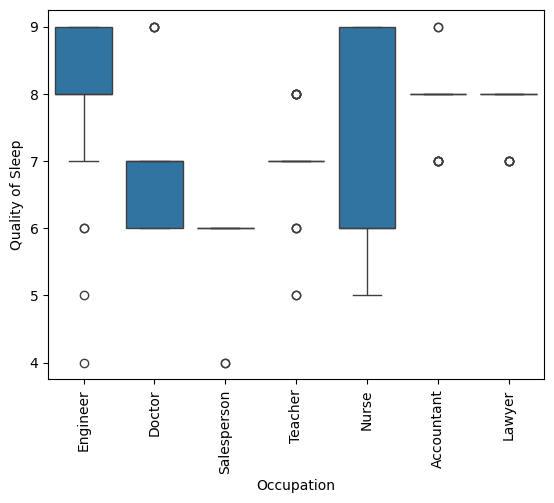

In [ ]:
plt.xticks(rotation=90)
sns.boxplot(df, x='Occupation', y='Quality of Sleep')

In [ ]:
df[(df['Occupation'] == 'Engineer') & (df['Quality of Sleep'] <= 6)]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal
5,6,Male,28,Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
147,148,Male,39,Engineer,6.5,5,40,7,Overweight,132/87,80,4000,Insomnia
203,204,Male,43,Engineer,6.9,6,47,7,Normal Weight,117/76,69,6800,Normal


In [ ]:
df[(df['Occupation'] == 'Doctor') & (df['Quality of Sleep'] >= 8)]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
276,277,Male,49,Doctor,8.1,9,85,3,Obese,139/91,86,3700,Sleep Apnea
277,278,Male,49,Doctor,8.1,9,85,3,Obese,139/91,86,3700,Sleep Apnea
341,342,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,Normal
342,343,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,Normal


In [ ]:
df[(df['Occupation'] == 'Teacher') & (df['Quality of Sleep'] != 7)]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
98,99,Female,36,Teacher,7.1,8,60,4,Normal,115/75,68,7000,Normal
99,100,Female,36,Teacher,7.1,8,60,4,Normal,115/75,68,7000,Normal
100,101,Female,36,Teacher,7.2,8,60,4,Normal,115/75,68,7000,Normal
101,102,Female,36,Teacher,7.2,8,60,4,Normal,115/75,68,7000,Normal
102,103,Female,36,Teacher,7.2,8,60,4,Normal,115/75,68,7000,Normal
103,104,Male,36,Teacher,6.6,5,35,7,Overweight,129/84,74,4800,Sleep Apnea
104,105,Female,36,Teacher,7.2,8,60,4,Normal,115/75,68,7000,Sleep Apnea
105,106,Male,36,Teacher,6.6,5,35,7,Overweight,129/84,74,4800,Insomnia
184,185,Female,42,Teacher,6.8,6,45,7,Overweight,130/85,78,5000,Sleep Apnea


### Tirei algumas colunas que achei que serão desnecessárias

In [ ]:
df['BMI Category'] = df['BMI Category'].replace({'Normal Weight': 'Normal'})

df = df.drop(columns=['Person ID', 'Gender', 'Blood Pressure'])

df.head(15)

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,27,Engineer,6.1,6,42,6,Overweight,77,4200,Normal
1,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal
2,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal
3,28,Salesperson,5.9,4,30,8,Obese,85,3000,Sleep Apnea
4,28,Salesperson,5.9,4,30,8,Obese,85,3000,Sleep Apnea
5,28,Engineer,5.9,4,30,8,Obese,85,3000,Insomnia
6,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia
7,29,Doctor,7.8,7,75,6,Normal,70,8000,Normal
8,29,Doctor,7.8,7,75,6,Normal,70,8000,Normal
9,29,Doctor,7.8,7,75,6,Normal,70,8000,Normal


# Enconding

In [ ]:
df = pd.get_dummies(df, columns=['BMI Category', 'Sleep Disorder'], drop_first=True)

In [ ]:
df.head(10)

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Normal,Sleep Disorder_Sleep Apnea
0,27,Engineer,6.1,6,42,6,77,4200,False,True,True,False
1,28,Doctor,6.2,6,60,8,75,10000,False,False,True,False
2,28,Doctor,6.2,6,60,8,75,10000,False,False,True,False
3,28,Salesperson,5.9,4,30,8,85,3000,True,False,False,True
4,28,Salesperson,5.9,4,30,8,85,3000,True,False,False,True
5,28,Engineer,5.9,4,30,8,85,3000,True,False,False,False
6,29,Teacher,6.3,6,40,7,82,3500,True,False,False,False
7,29,Doctor,7.8,7,75,6,70,8000,False,False,True,False
8,29,Doctor,7.8,7,75,6,70,8000,False,False,True,False
9,29,Doctor,7.8,7,75,6,70,8000,False,False,True,False
